# Pediatric Hemodynamic Shock Prediction
### Dataset Description

This dataset contains medical data from pediatric intensive care unit (PICU) patients, with clinical measurements and a binary target variable indicating whether a patient will develop shock within 6 hours.

**The dataset includes 500,000 records with the following features:**

- **patient_id:** A unique identifier for each patient in the format PICU_XXXXXX.
- **age_months:** The patient's age in months, ranging from 0 to 200 months (~0-16 years).
- **weight_kg:** The patient's weight in kilograms, ranging from 3 to 80 kg.
- **heart_rate:** The patient's heart rate (beats per minute), ranging from 60 to 220 bpm.
- **blood_pressure_sys:** The systolic blood pressure (mmHg), ranging from 60 to 140 mmHg.
- **blood_pressure_dia:** The diastolic blood pressure (mmHg), ranging from 30 to 90 mmHg.
- **respiratory_rate:** The respiratory rate (breaths per minute), ranging from 15 to 70 breaths per minute.
- **spo2:** The blood oxygen saturation percentage, ranging from 70% to 100%.
- **temperature_c:** The body temperature in Celsius, ranging from 34°C to 41°C.
- **lactate_level:** The lactate level (mmol/L), ranging from 0.5 to 10 mmol/L.
- **capillary_refill_sec:** The capillary refill time (seconds), ranging from 1 to 5 seconds.
- **gcs_score:** The Glasgow Coma Scale score, ranging from 3 to 15.
- **base_deficit:** The base deficit (mmol/L), ranging from -15 to 5 mmol/L.
- **urine_output_ml_hr:** The urine output (mL/hr), ranging from 0 to 3 mL/hr.
- **crt_level:** The creatinine level (mg/dL), ranging from 0.2 to 2.0 mg/dL.
- **bun_level:** The blood urea nitrogen (BUN) level (mg/dL), ranging from 5 to 30 mg/dL.
- **wbc_count:** The white blood cell (WBC) count (10^3/μL), ranging from 3 to 30 10^3/μL.
- **hemoglobin:** The hemoglobin level (g/dL), ranging from 6 to 18 g/dL.
- **platelet_count:** The platelet count (10^3/μL), ranging from 50 to 500 10^3/μL.
- **bilirubin:** The bilirubin level (mg/dL), ranging from 0.1 to 3.0 mg/dL.
- **pco2:** The partial pressure of carbon dioxide (PCO2) in mmHg, ranging from 20 to 70 mmHg.


In [1]:
# Import all the important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore Python Warnings

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [2]:
train_df = pd.read_csv(r"E:\Pediatric-Hemodynamic-Shock-Prediction-MLOps\artifacts\train.csv")

df = train_df.copy()

train_df.head()

,patient_id,age_months,weight_kg,heart_rate,blood_pressure_sys,blood_pressure_dia,respiratory_rate,spo2,temperature_c,lactate_level,...,base_deficit,urine_output_ml_hr,crt_level,bun_level,wbc_count,hemoglobin,platelet_count,bilirubin,pco2,shock_within_6h
0,PICU_H0FQ7T,90,34.0,156.160901,71.427734,38.858875,39.194144,95.652086,36.554414,3.264843,...,-1.157149,0.600966,0.665420,8.837848,14.116376,12.128002,268.667109,1.045166,28.150307,0
1,PICU_42MG9Q,70,3.0,132.576916,103.798253,62.553221,30.172230,96.712082,36.922749,3.453267,...,-0.290213,1.541602,0.882742,11.611350,6.947090,11.882675,417.412011,1.214621,60.628933,0
2,PICU_LMN9UY,41,9.3,131.920616,92.643337,57.655753,48.241054,94.605399,37.138156,2.212843,...,-1.798318,1.542965,0.488933,16.268365,8.631047,11.184398,162.750538,1.112925,29.554537,0
3,PICU_2JSK9V,113,9.8,158.971516,91.617776,72.681294,22.599336,94.063359,35.940219,0.500000,...,-3.168024,1.881490,0.403205,17.931145,11.854980,12.305573,281.549848,0.703433,43.759481,0
4,PICU_UVLSUH,32,9.5,88.636539,94.106276,63.070195,47.844484,94.313498,37.437712,3.994252,...,-7.048188,1.955249,0.862392,8.873919,8.371553,6.000000,182.918424,0.653935,42.530791,0


In [3]:
df.shape

(300000, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   patient_id            300000 non-null  object 
 1   age_months            300000 non-null  int64  
 2   weight_kg             300000 non-null  float64
 3   heart_rate            300000 non-null  float64
 4   blood_pressure_sys    300000 non-null  float64
 5   blood_pressure_dia    300000 non-null  float64
 6   respiratory_rate      300000 non-null  float64
 7   spo2                  300000 non-null  float64
 8   temperature_c         300000 non-null  float64
 9   lactate_level         300000 non-null  float64
 10  capillary_refill_sec  300000 non-null  float64
 11  gcs_score             300000 non-null  int64  
 12  base_deficit          300000 non-null  float64
 13  urine_output_ml_hr    300000 non-null  float64
 14  crt_level             300000 non-null  float64
 15  

- No null values

In [5]:
df.columns

Index(['patient_id', 'age_months', 'weight_kg', 'heart_rate',
       'blood_pressure_sys', 'blood_pressure_dia', 'respiratory_rate', 'spo2',
       'temperature_c', 'lactate_level', 'capillary_refill_sec', 'gcs_score',
       'base_deficit', 'urine_output_ml_hr', 'crt_level', 'bun_level',
       'wbc_count', 'hemoglobin', 'platelet_count', 'bilirubin', 'pco2',
       'shock_within_6h'],
      dtype='object')

In [6]:
# Drop Unecessary columns

df = df.drop(columns=['patient_id'])

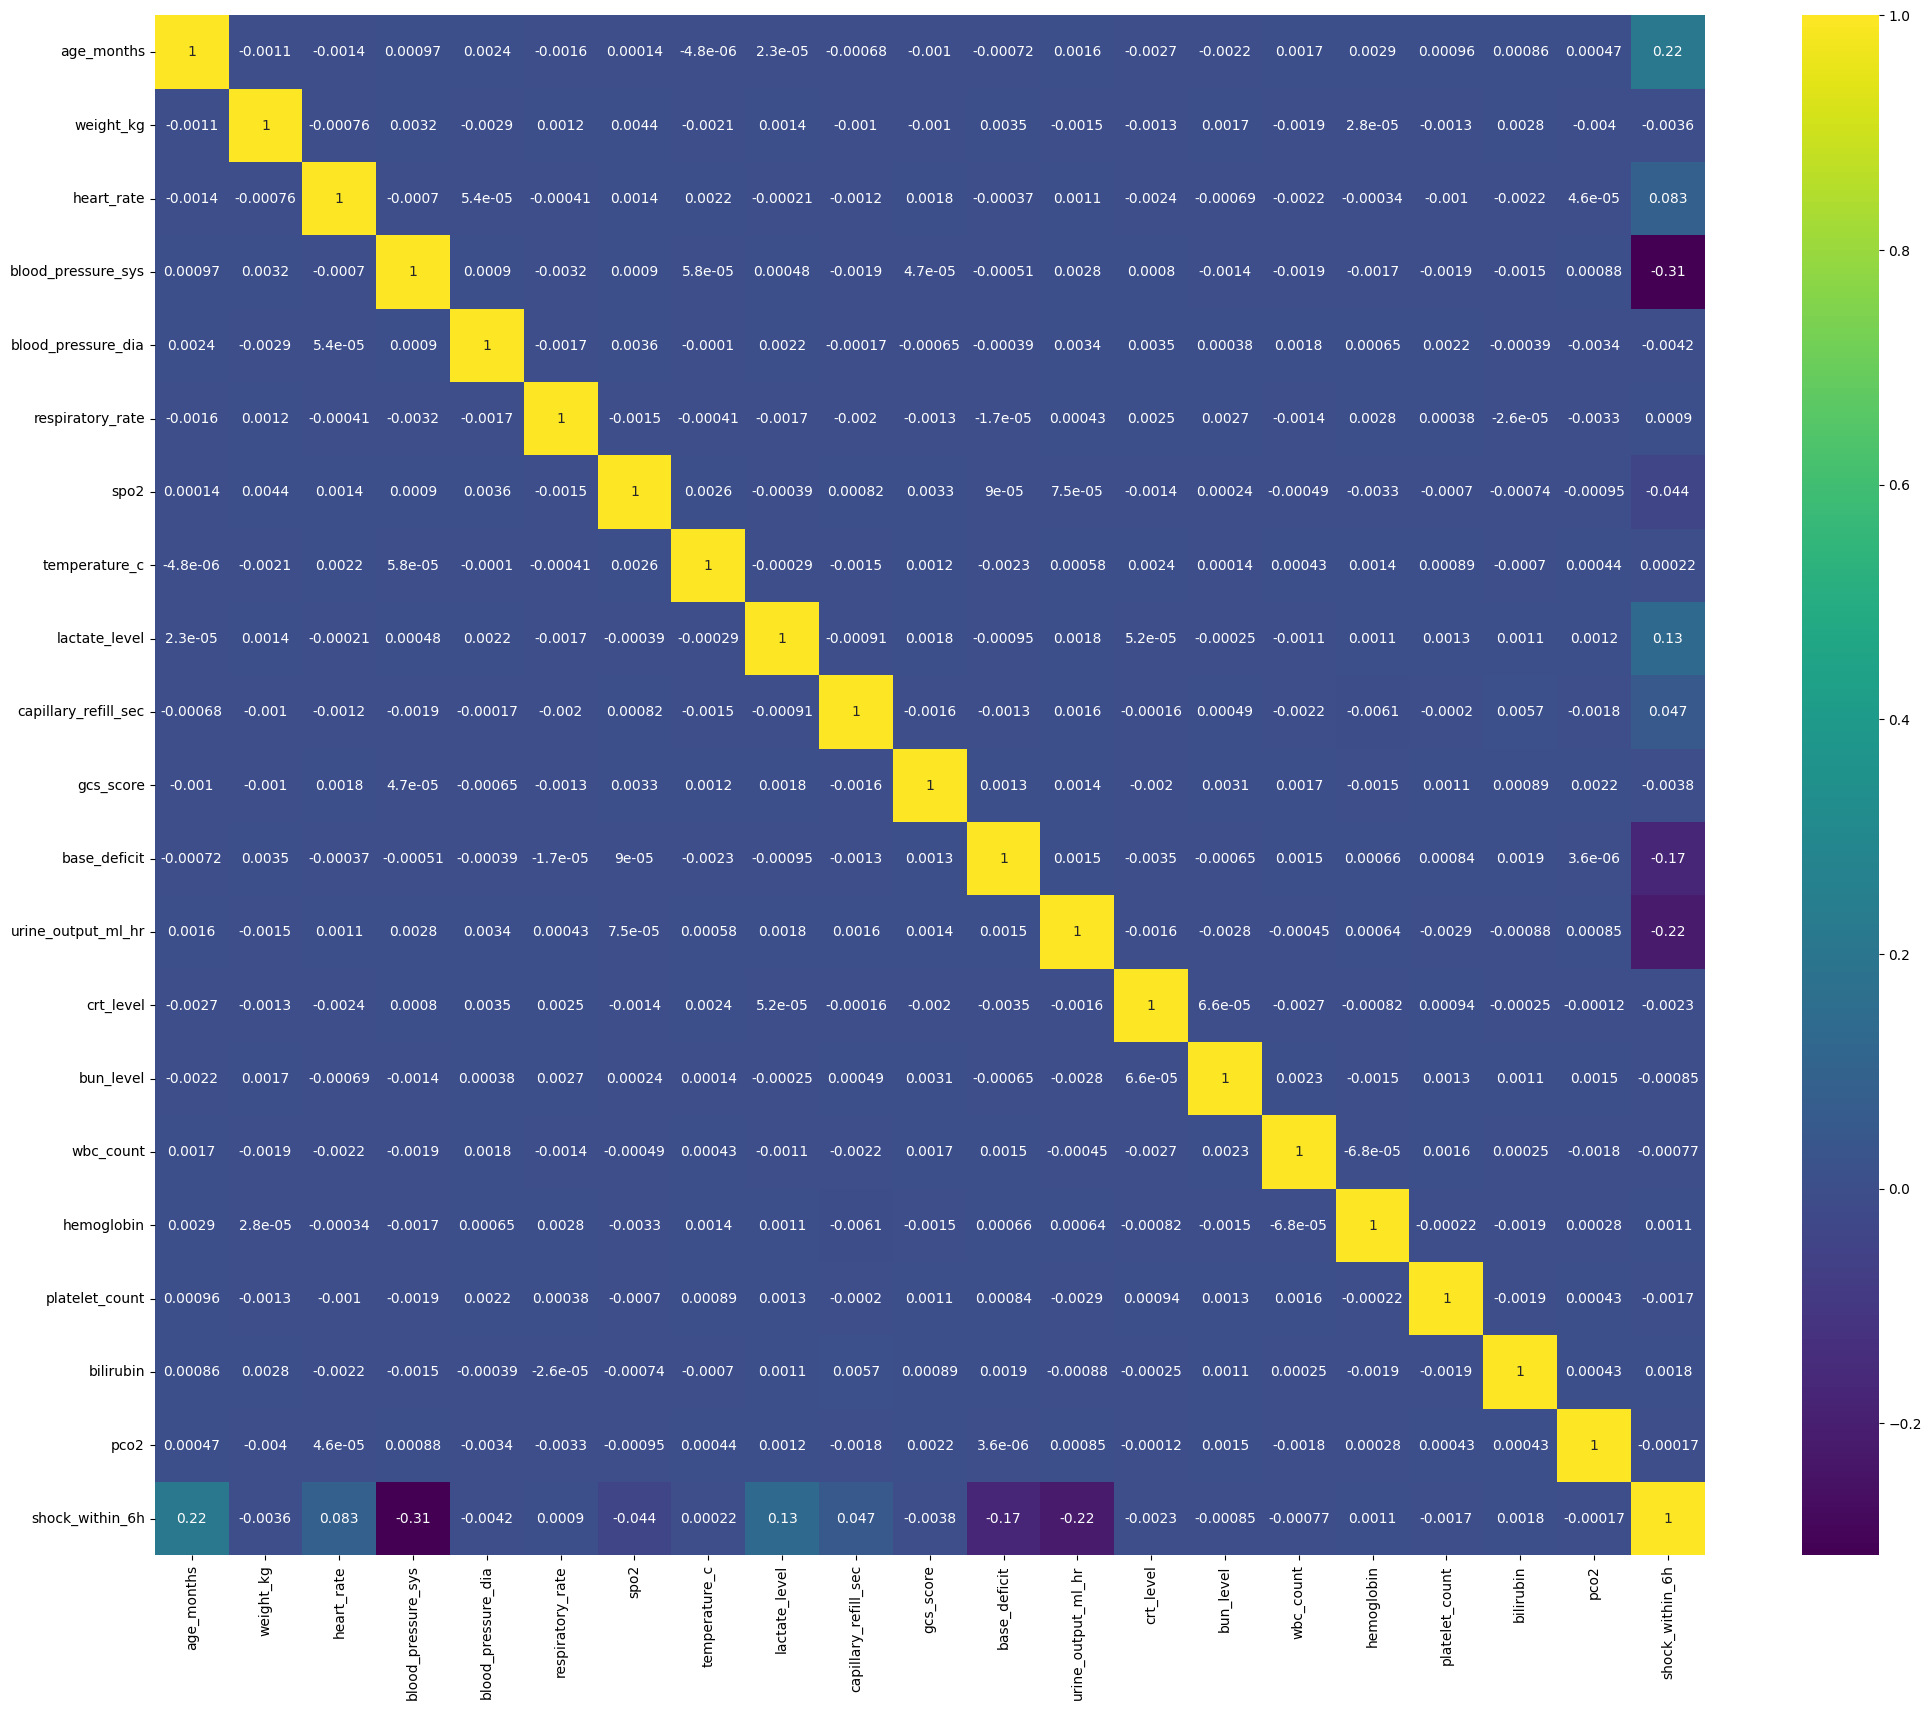

In [7]:
# Correlation

plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.show()

In [8]:
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n" + "-" * 40 + "\n")

Value counts for column 'age_months':
age_months
108    1590
142    1584
36     1575
183    1567
167    1566
       ... 
158    1422
141    1420
113    1416
178    1404
54     1402
Name: count, Length: 201, dtype: int64

----------------------------------------

Value counts for column 'weight_kg':
weight_kg
3.0     13657
20.3     1266
20.8     1261
19.1     1258
20.2     1246
        ...  
58.9        1
60.1        1
66.5        1
58.6        1
56.2        1
Name: count, Length: 560, dtype: int64

----------------------------------------

Value counts for column 'heart_rate':
heart_rate
60.000000     2964
220.000000     428
101.556341       1
78.119397        1
127.423976       1
              ... 
123.169538       1
109.106693       1
198.597569       1
120.471183       1
164.525625       1
Name: count, Length: 296610, dtype: int64

----------------------------------------

Value counts for column 'blood_pressure_sys':
blood_pressure_sys
60.000000     6869
140.000000     121
99.66363

In [9]:
df['shock_within_6h'].value_counts()

shock_within_6h
0    246723
1     53277
Name: count, dtype: int64

- Classes are highly imbalanced, we need to balance them

In [10]:
# Checking for duplicates

df.duplicated().sum()

np.int64(0)

- No duplicated records

In [11]:
X = df.drop(columns=['shock_within_6h'])
y = df['shock_within_6h']

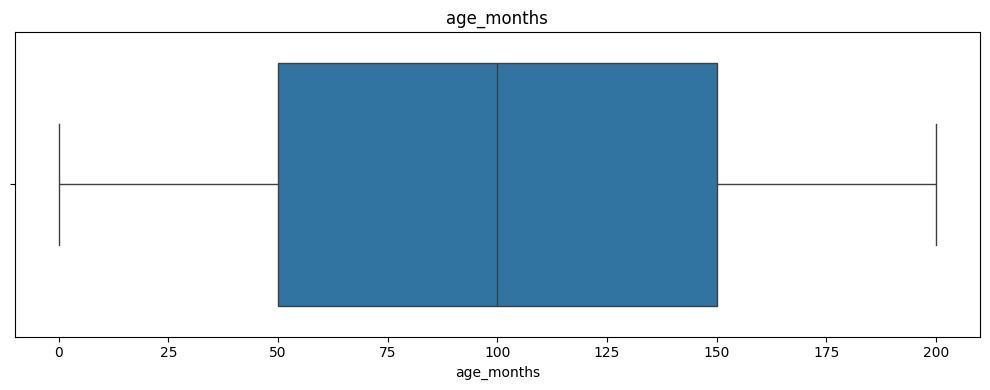

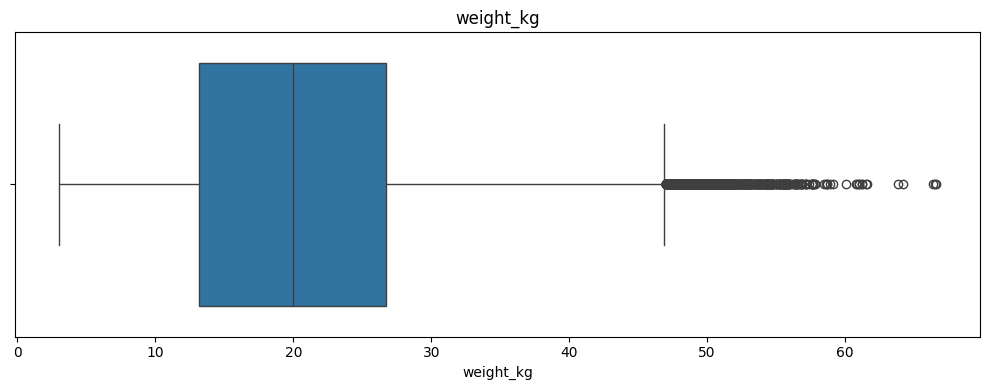

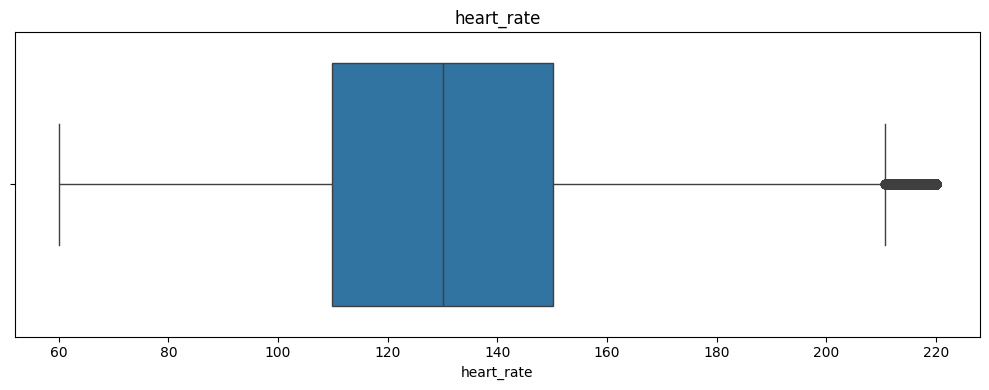

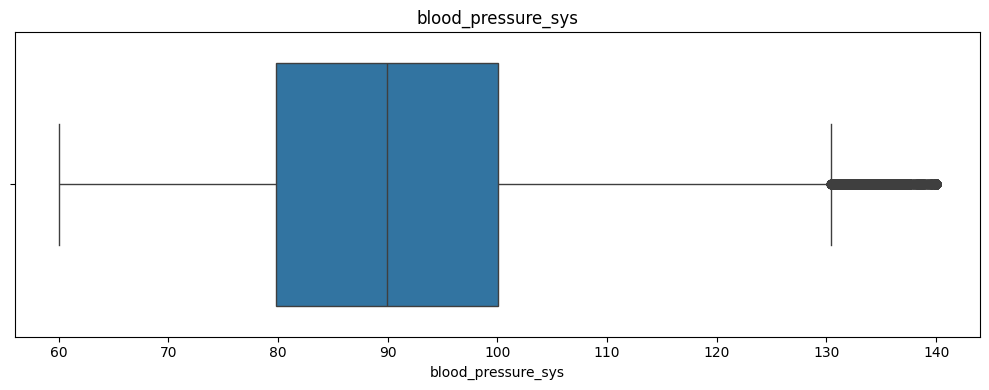

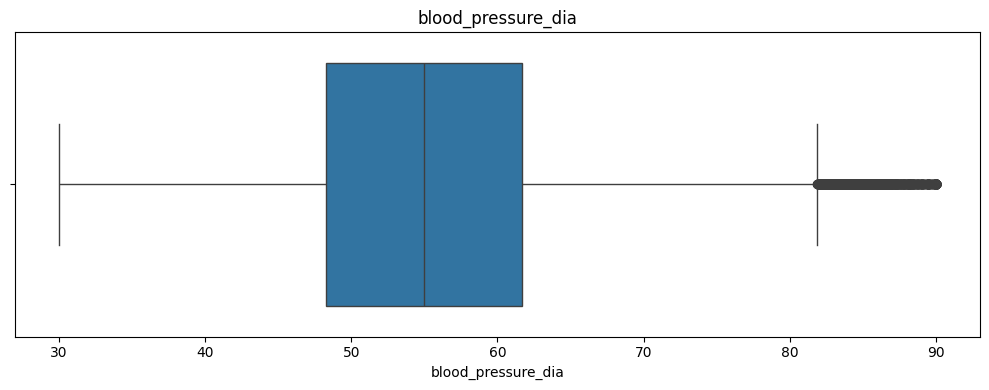

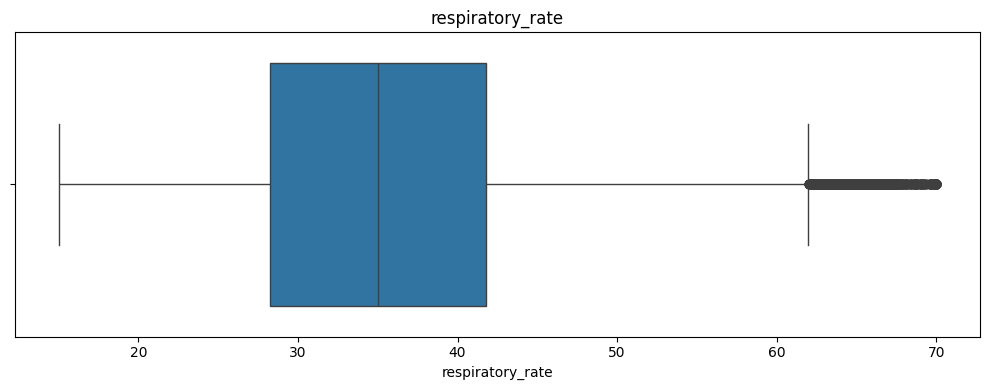

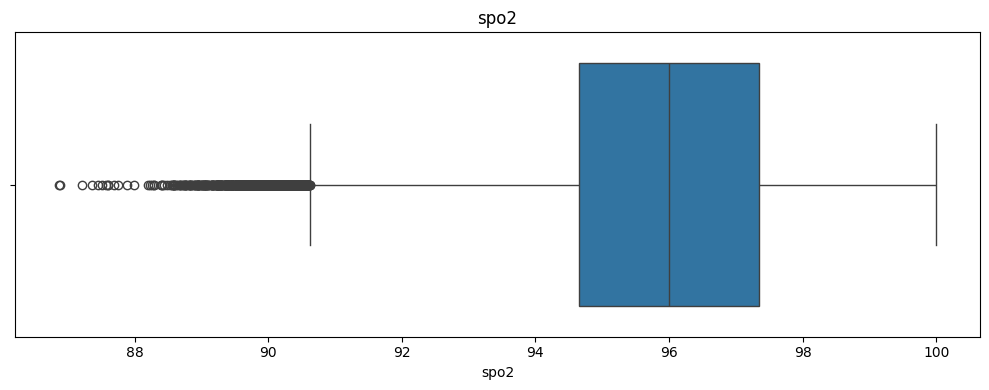

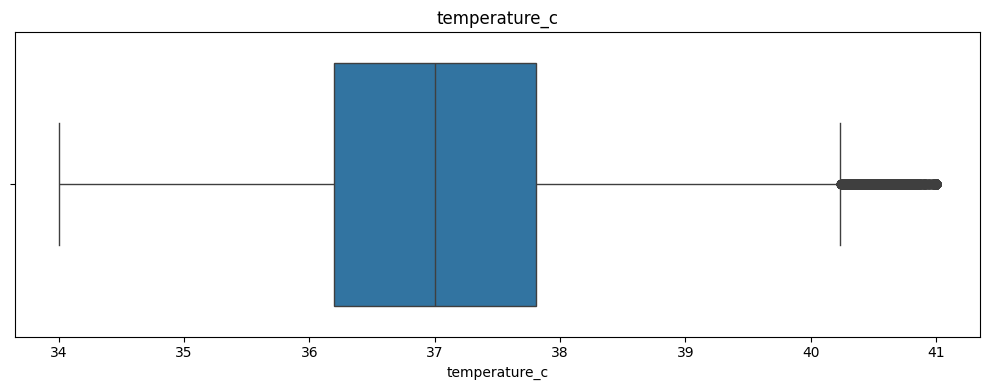

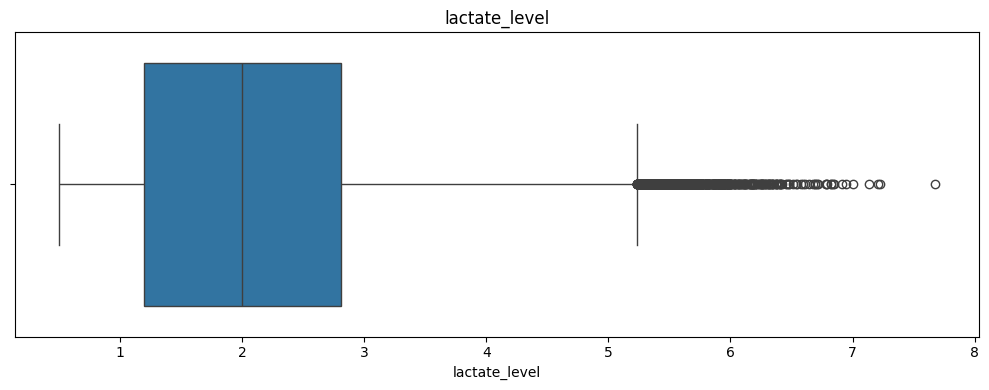

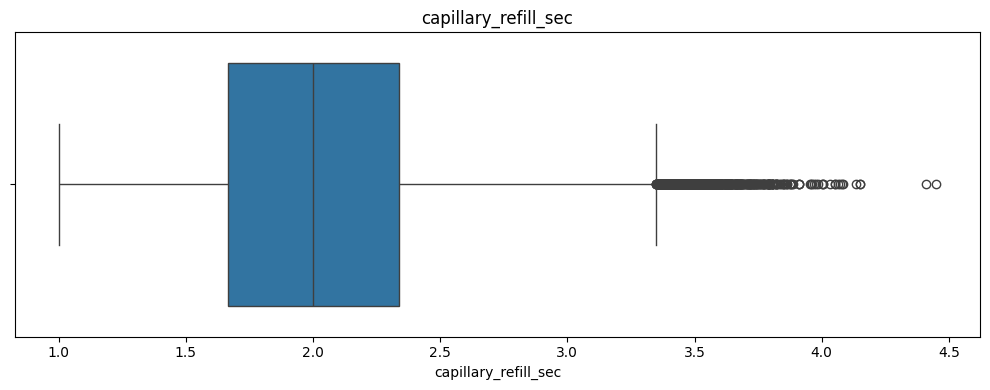

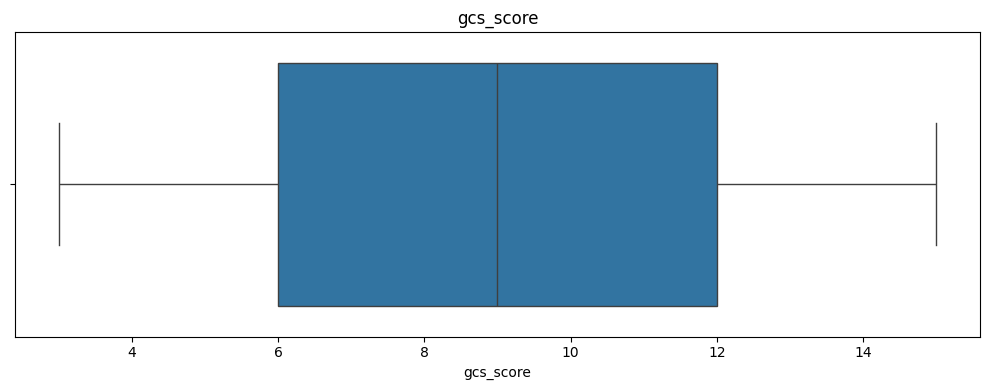

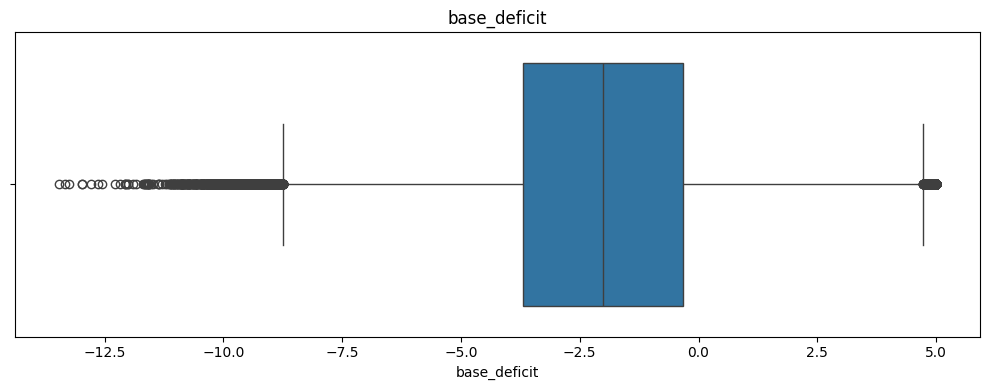

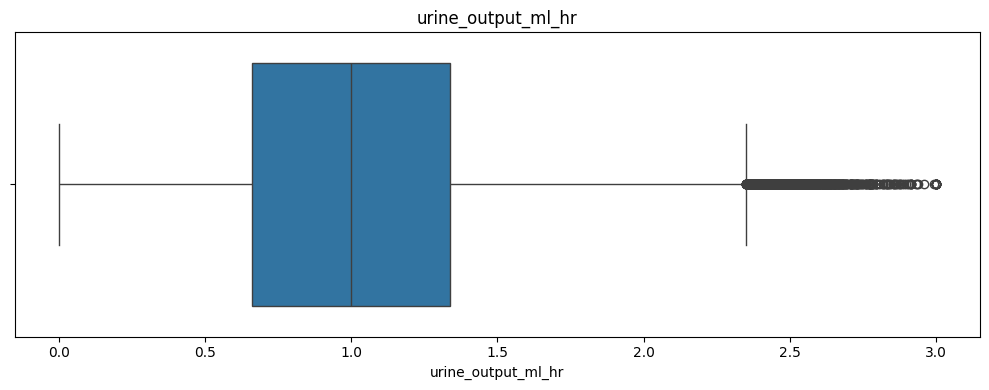

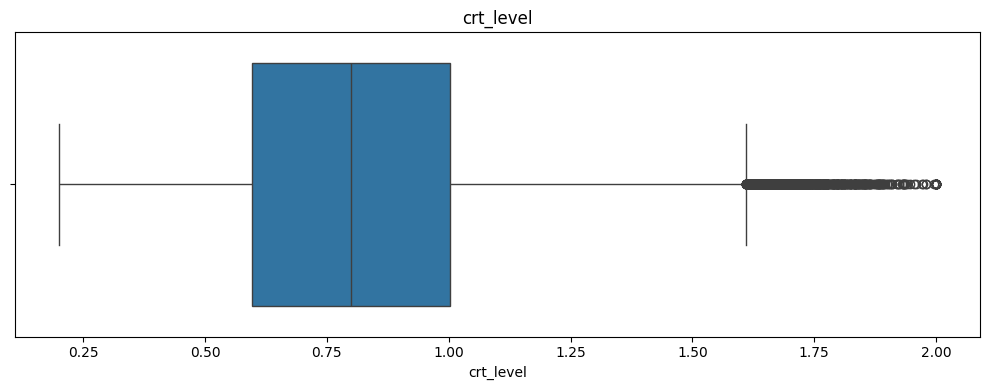

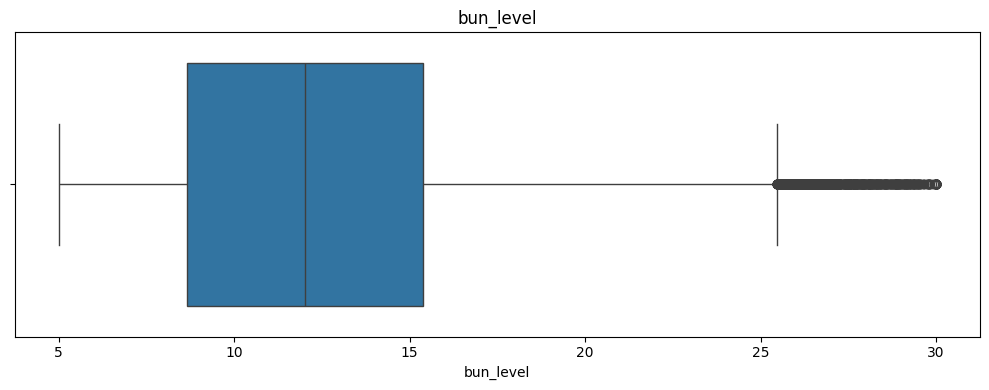

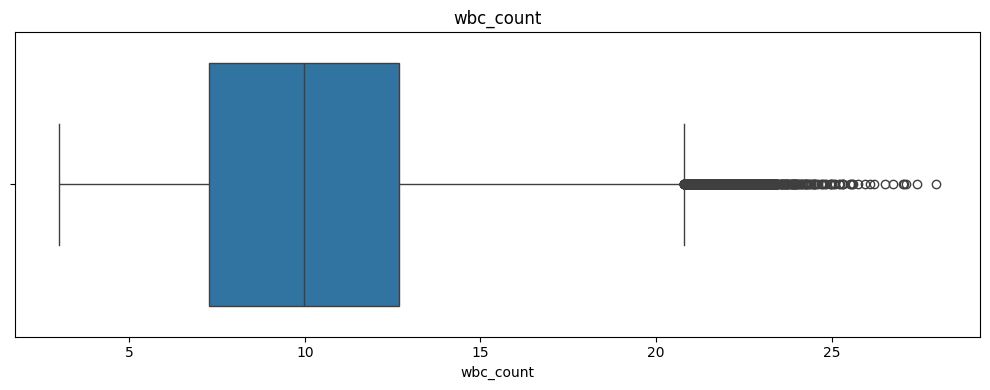

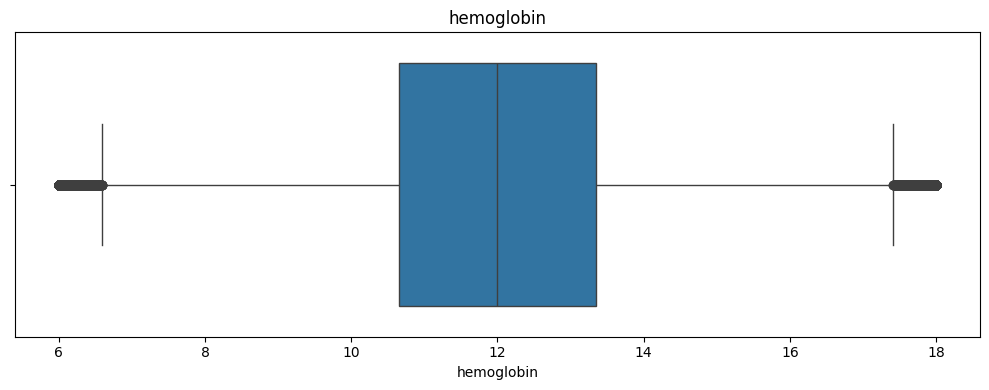

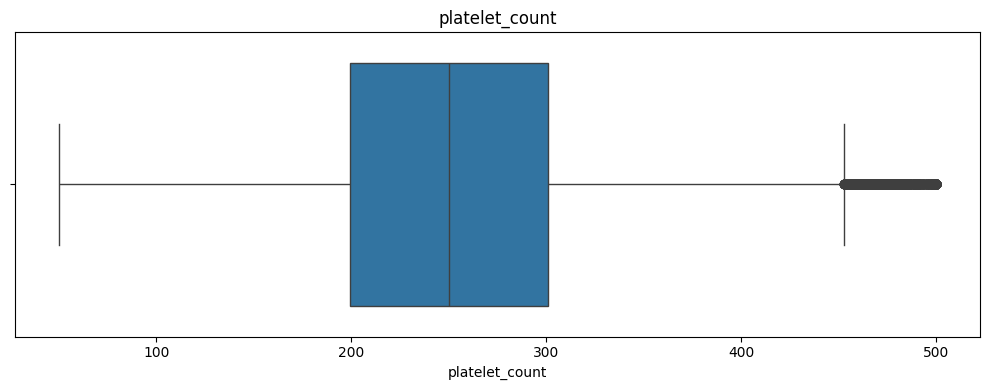

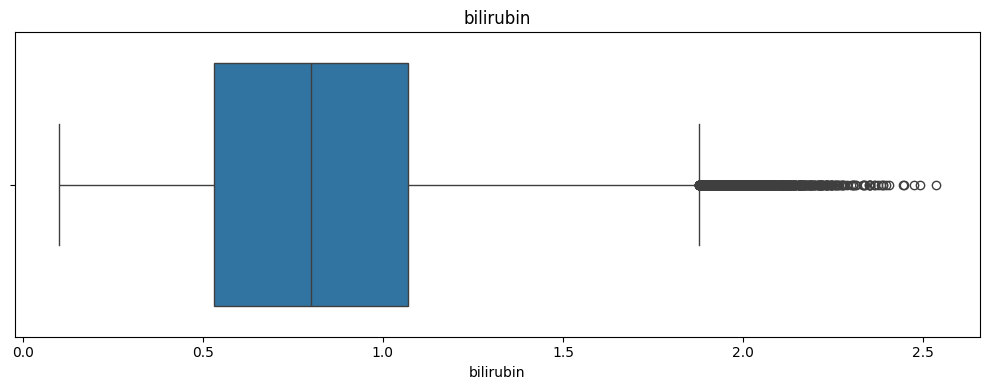

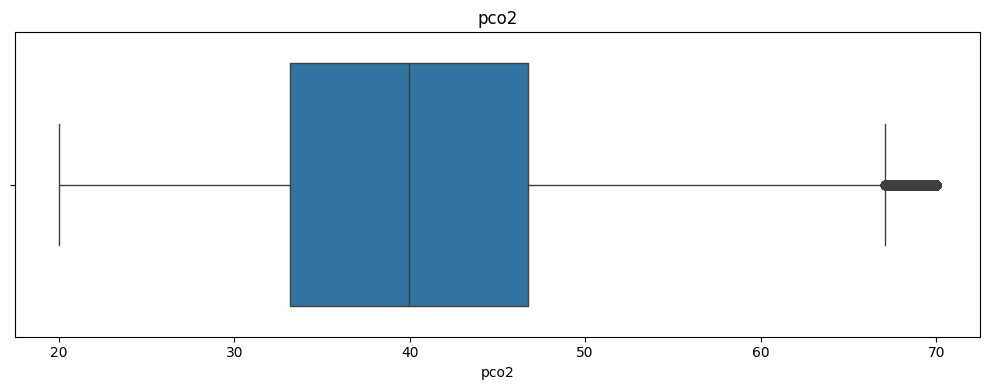

In [12]:
# Boxplot for each column

for column in X.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'{column}')
    plt.tight_layout()
    plt.show()

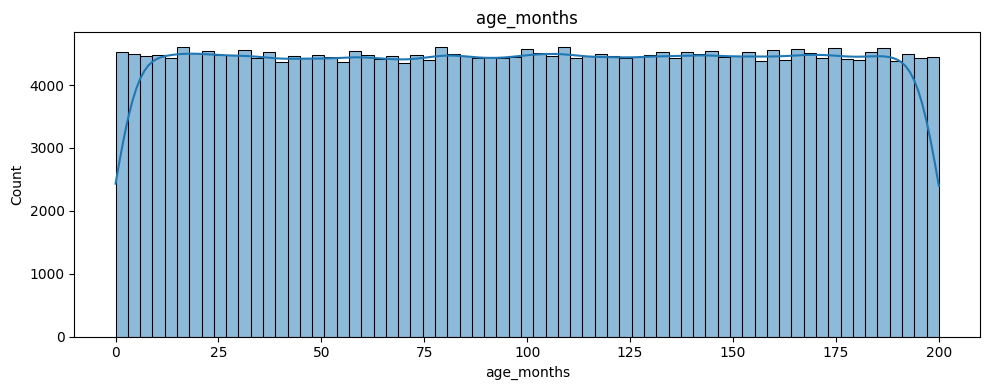

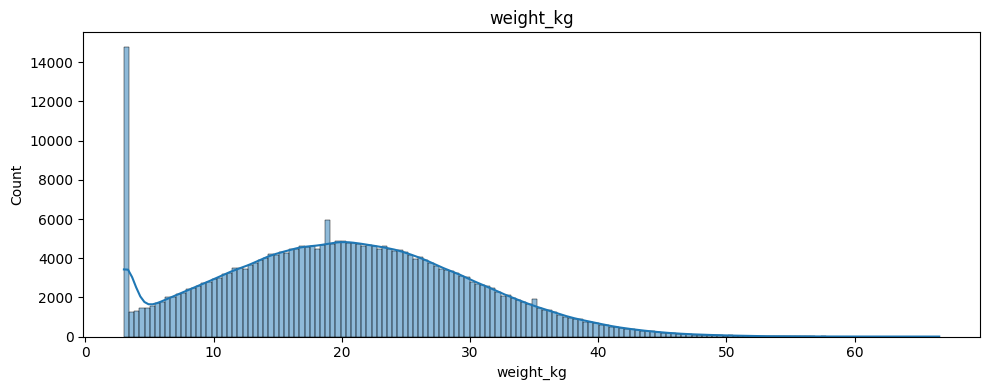

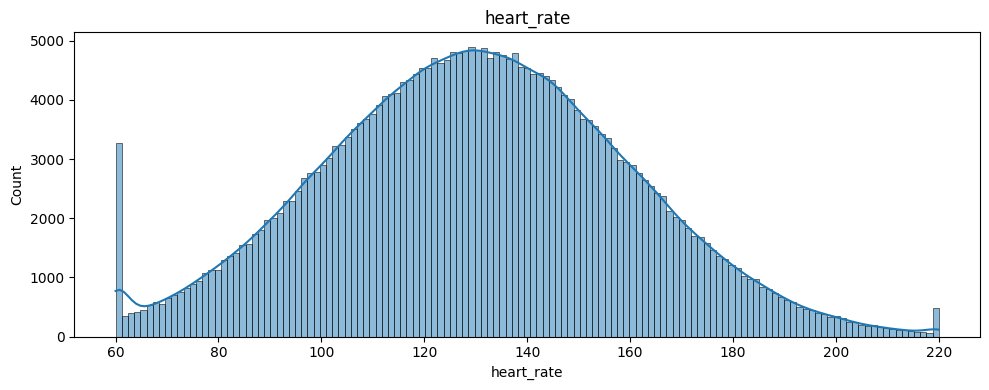

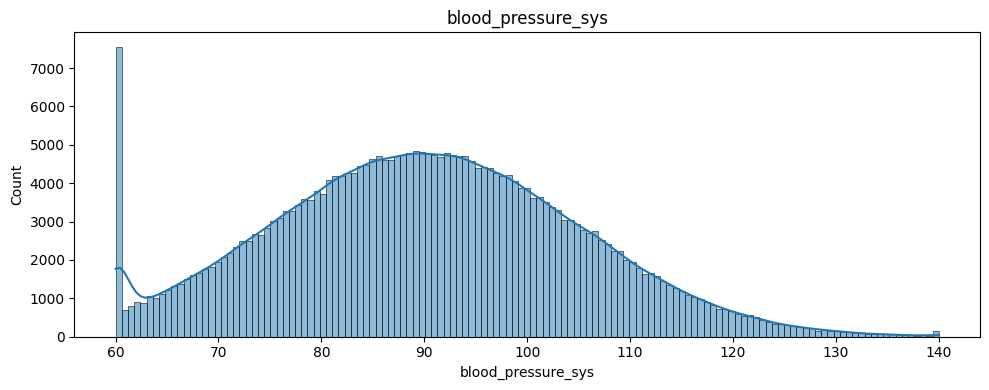

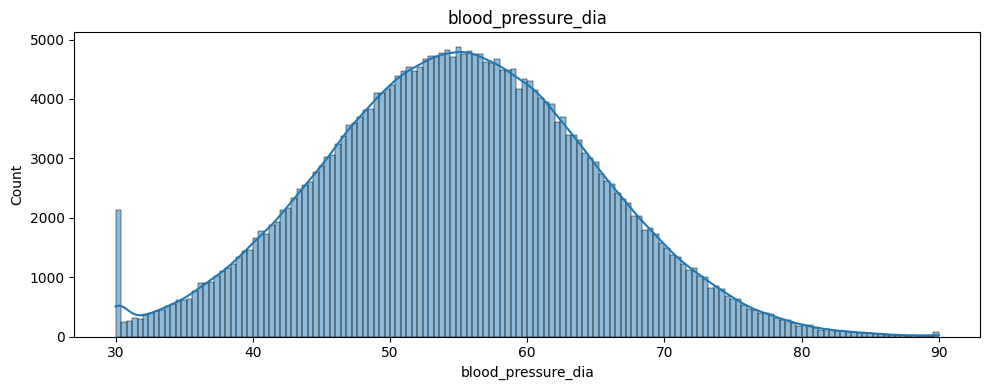

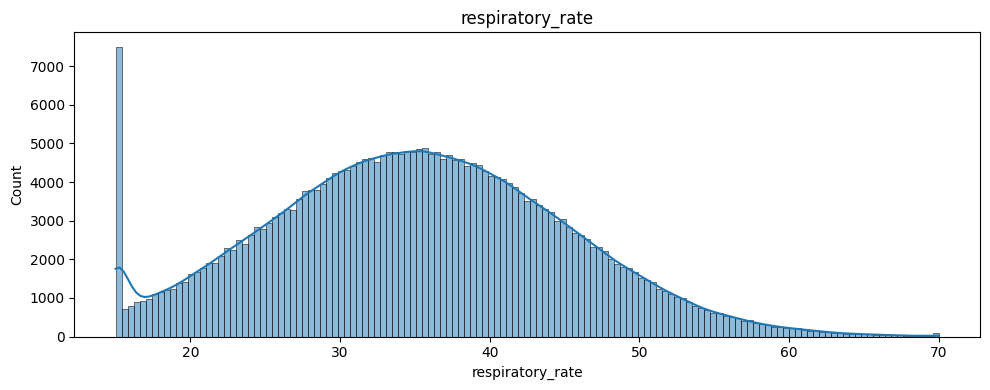

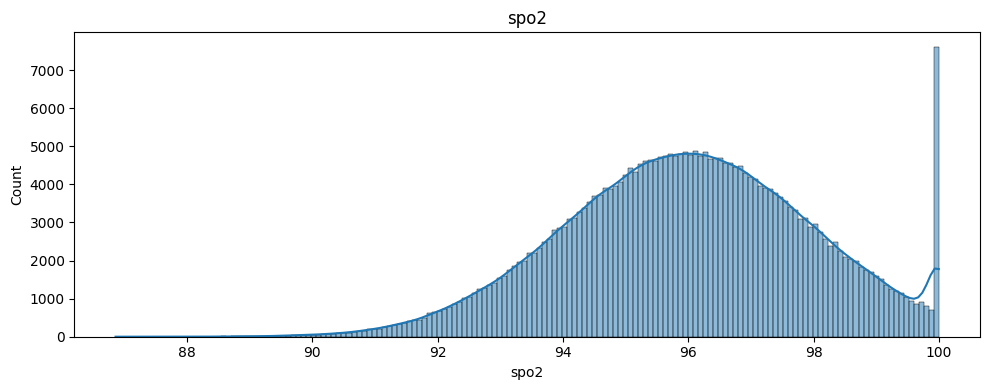

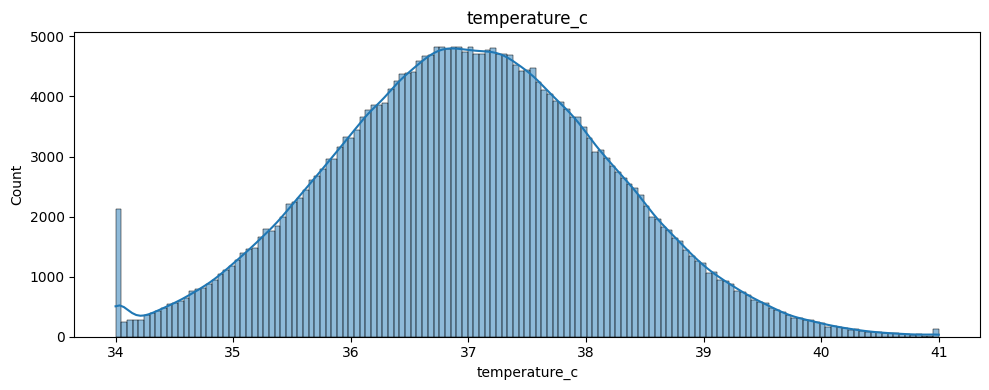

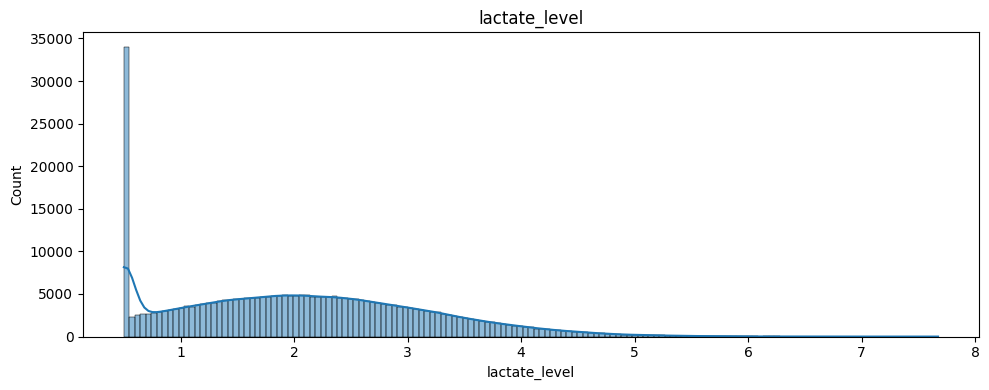

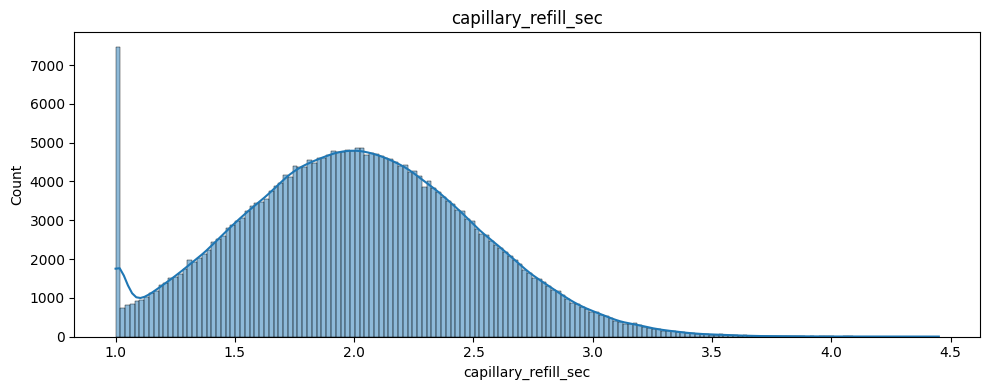

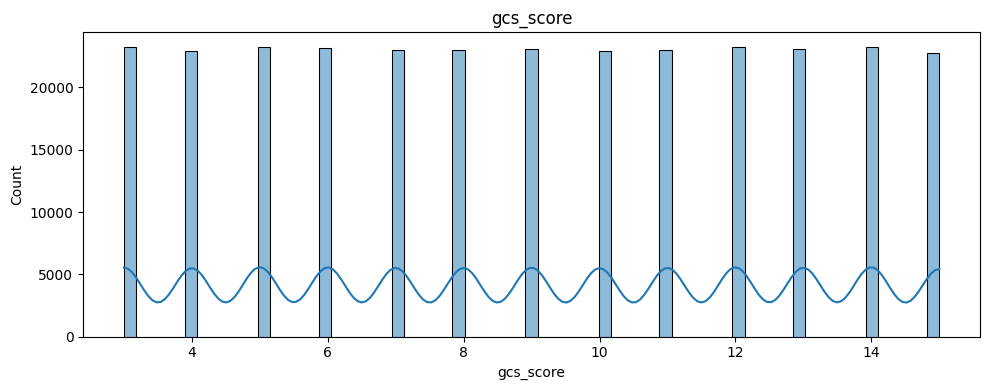

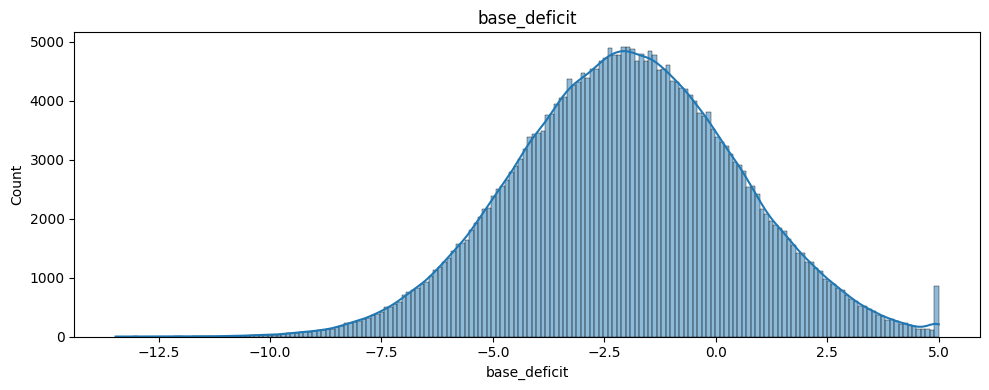

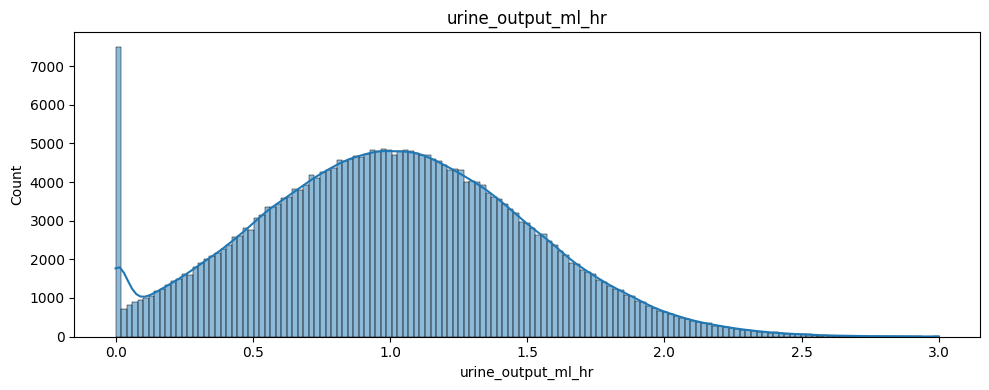

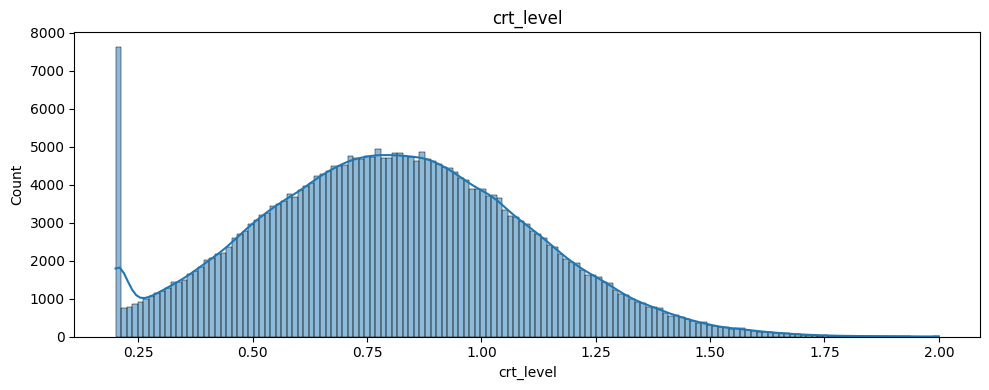

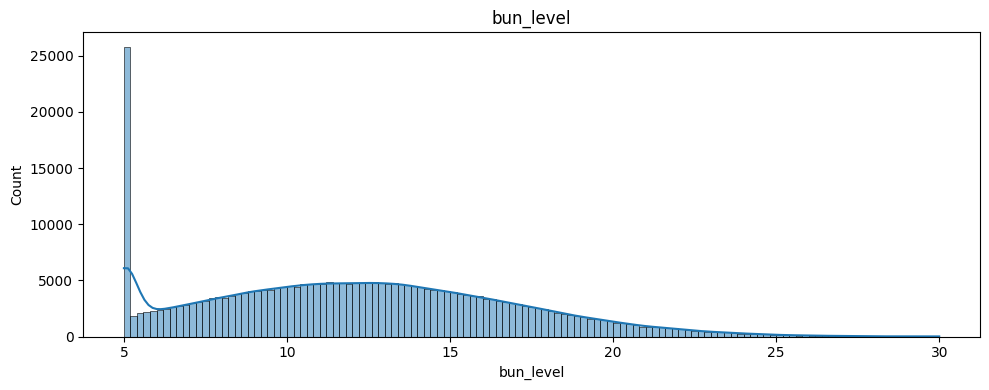

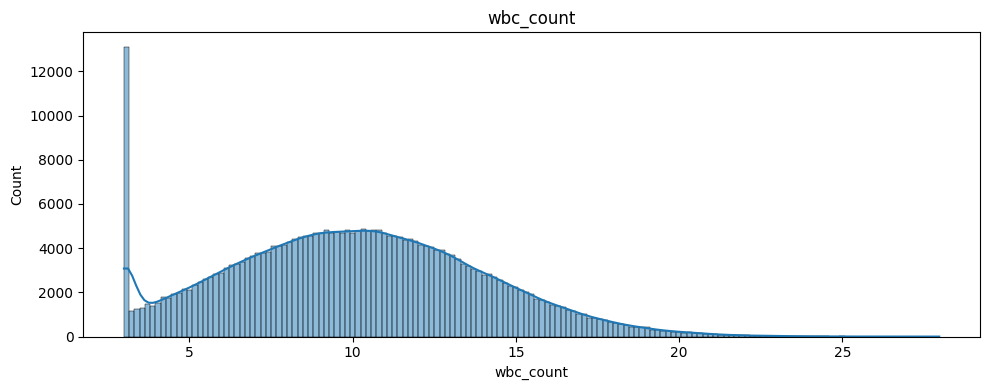

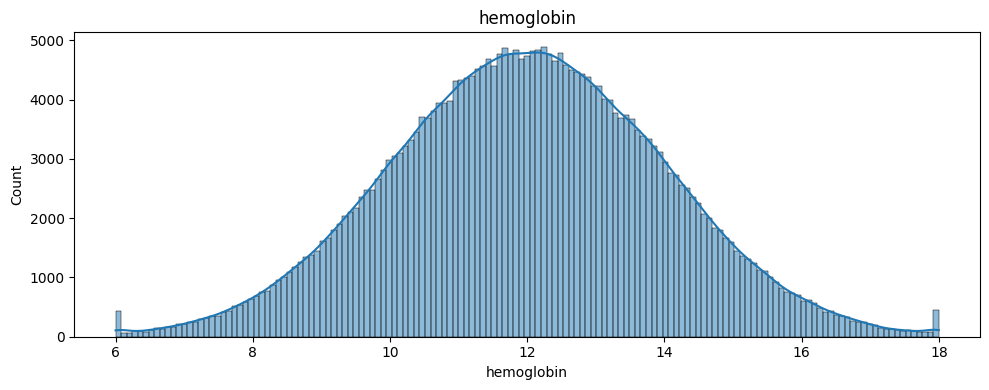

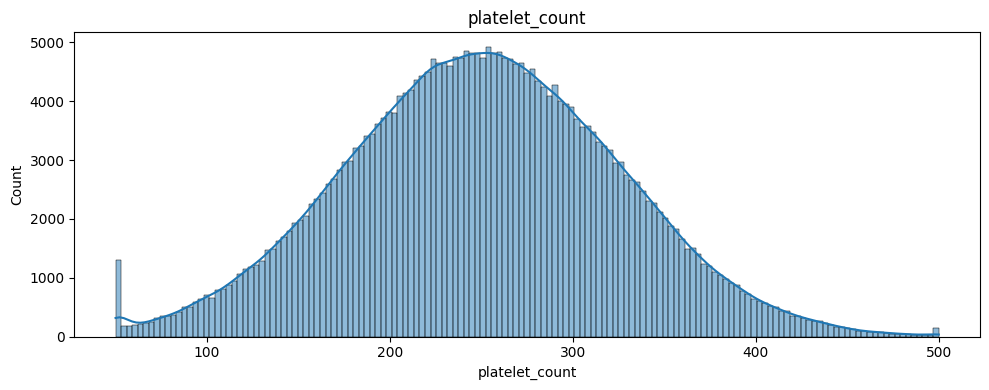

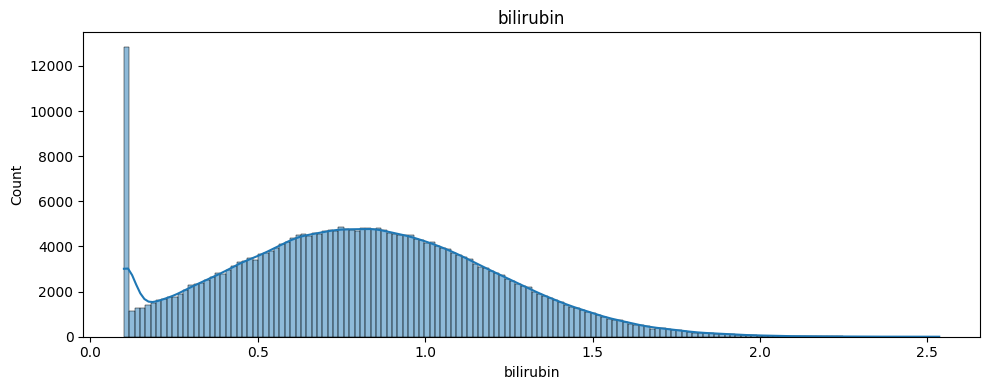

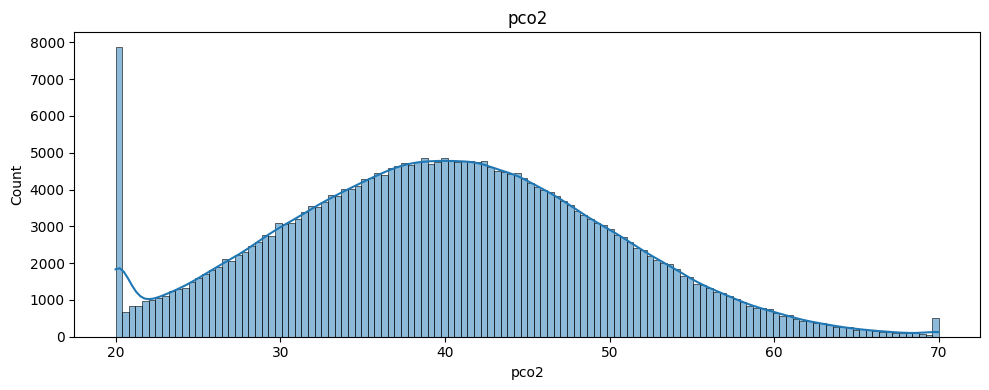

In [13]:
# Histplot for each column

for column in X.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'{column}')
    plt.tight_layout()
    plt.show()

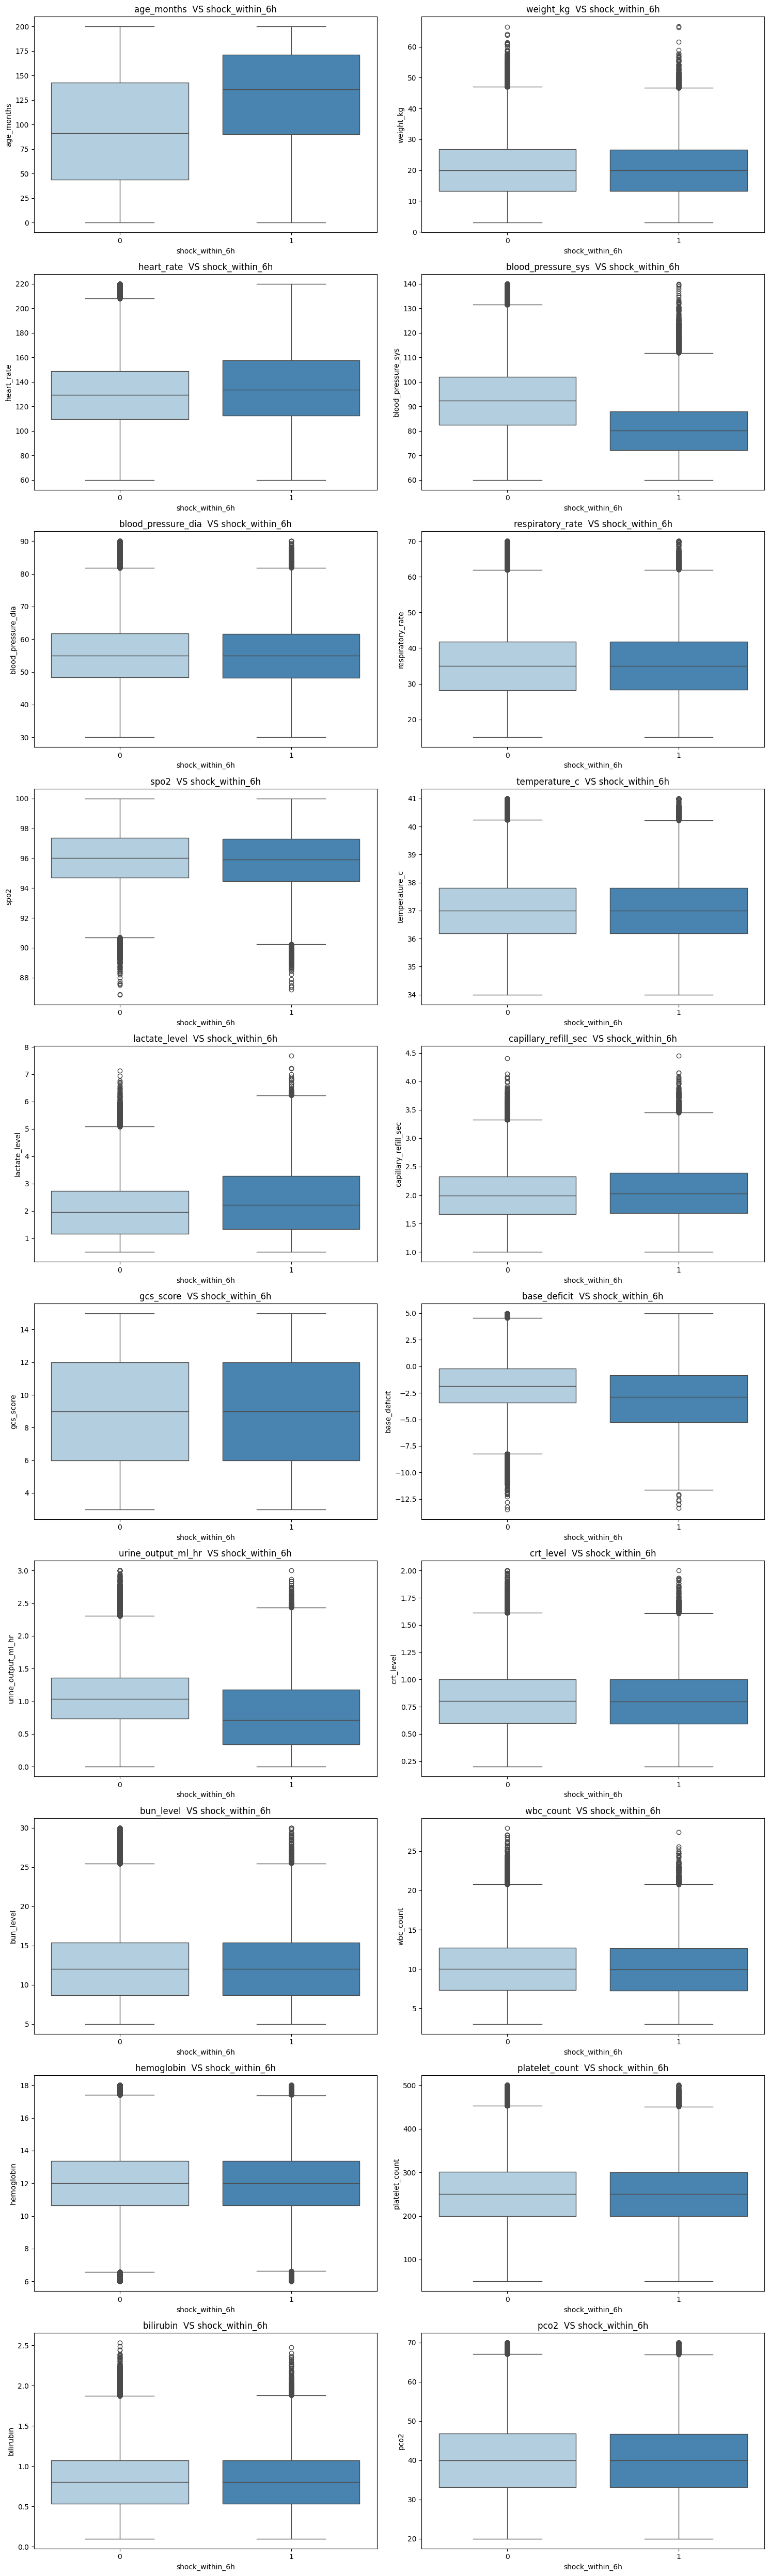

In [14]:
# Bivariate Analysis

def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

plot_bivariate_num(df, 'shock_within_6h', X.columns)

In [15]:
# Checking for Skewness

skewness  = df.skew()

skewness

age_months             -0.002158
weight_kg               0.215445
heart_rate              0.053221
blood_pressure_sys      0.120619
blood_pressure_dia      0.033884
respiratory_rate        0.126149
spo2                   -0.120540
temperature_c           0.035398
lactate_level           0.415807
capillary_refill_sec    0.126930
gcs_score               0.000689
base_deficit           -0.022992
urine_output_ml_hr      0.124179
crt_level               0.126094
bun_level               0.340499
wbc_count               0.199288
hemoglobin             -0.003249
platelet_count          0.020359
bilirubin               0.198401
pco2                    0.116596
shock_within_6h         1.687280
dtype: float64

- No need to worry about skewness as values are very small

### Handling Imbalanced Data

In [16]:
df['shock_within_6h'].value_counts()

shock_within_6h
0    246723
1     53277
Name: count, dtype: int64

In [17]:
X = df.drop(columns='shock_within_6h')
y = df["shock_within_6h"]

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_residual , y_residual = smote.fit_resample(X,y)

y_residual.value_counts()

shock_within_6h
0    246723
1    246723
Name: count, dtype: int64

- Hence, we have used SMOTE technique to balance our dataset

In [19]:
balanced_df = pd.DataFrame(X_residual , columns=X.columns)
balanced_df["shock_within_6h"] = y_residual

df = balanced_df.copy()

### Feature Selection

In [20]:
len(df.columns)

21

In [21]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns='shock_within_6h')
y = df["shock_within_6h"]

model =  RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [22]:
feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

top_features_importance_df = feature_importance_df.sort_values(by="importance" , ascending=False)

In [23]:
top_features_importance_df

,feature,importance
3,blood_pressure_sys,0.260122
12,urine_output_ml_hr,0.121368
0,age_months,0.117490
11,base_deficit,0.088906
8,lactate_level,0.081472
2,heart_rate,0.055699
9,capillary_refill_sec,0.030122
6,spo2,0.028886
14,bun_level,0.023869
18,bilirubin,0.021512


In [24]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["shock_within_6h"]]

top_10_df.head()

,blood_pressure_sys,urine_output_ml_hr,age_months,base_deficit,lactate_level,heart_rate,capillary_refill_sec,spo2,bun_level,bilirubin,shock_within_6h
0,71.427734,0.600966,90,-1.157149,3.264843,156.160901,1.751251,95.652086,8.837848,1.045166,0
1,103.798253,1.541602,70,-0.290213,3.453267,132.576916,1.899714,96.712082,11.611350,1.214621,0
2,92.643337,1.542965,41,-1.798318,2.212843,131.920616,2.070778,94.605399,16.268365,1.112925,0
3,91.617776,1.881490,113,-3.168024,0.500000,158.971516,2.818756,94.063359,17.931145,0.703433,0
4,94.106276,1.955249,32,-7.048188,3.994252,88.636539,1.333156,94.313498,8.873919,0.653935,0


In [25]:
top_10_df.columns

Index(['blood_pressure_sys', 'urine_output_ml_hr', 'age_months',
       'base_deficit', 'lactate_level', 'heart_rate', 'capillary_refill_sec',
       'spo2', 'bun_level', 'bilirubin', 'shock_within_6h'],
      dtype='object')

In [26]:
df = top_10_df.copy()

### Model Selection

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

X = df.drop(columns='shock_within_6h')
y = df["shock_within_6h"]

# Train test split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

#### Random Forest

In [28]:
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Model: Random Forest")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Model: Random Forest
Accuracy:  0.9144
Precision: 0.9236
Recall:    0.9033
F1 Score:  0.9133


#### Logistic Regression

In [29]:
logistic_regression_model = LogisticRegression(random_state=42)

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Predict on test set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Model: Logistic Regression")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Model: Logistic Regression
Accuracy:  0.8032
Precision: 0.7914
Recall:    0.8229
F1 Score:  0.8069


#### Gradient Boosting

In [30]:
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Model: Gradient Boosting")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Model: Gradient Boosting
Accuracy:  0.8843
Precision: 0.8924
Recall:    0.8738
F1 Score:  0.8830


#### Support Vector Machine

In [31]:
# svc_model = SVC(random_state=42)

# # Train the model
# svc_model.fit(X_train, y_train)

# # Predict on test set
# y_pred = svc_model.predict(X_test)

# # Evaluate the model0
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# # Print the results
# print("Model: Support Vector Machine")
# print(f"Accuracy:  {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall:    {recall:.4f}")
# print(f"F1 Score:  {f1:.4f}")

#### Decision Tree Classifier

In [32]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict on test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Model: Decision Tree Classifier")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Model: Decision Tree Classifier
Accuracy:  0.8783
Precision: 0.8729
Recall:    0.8854
F1 Score:  0.8791


#### K Neighbors Classifier

In [34]:
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Predict on test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Model: K Neighbors Classifier")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Model: K Neighbors Classifier
Accuracy:  0.8348
Precision: 0.7932
Recall:    0.9054
F1 Score:  0.8456


#### Naive Bayes Classifier

In [36]:
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Model: Naive Bayes Classifier")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Model: Naive Bayes Classifier
Accuracy:  0.8161
Precision: 0.7892
Recall:    0.8623
F1 Score:  0.8241


#### XGboost Classifier

In [37]:
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Model: XGboost Classifier")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Model: XGboost Classifier
Accuracy:  0.9040
Precision: 0.9100
Recall:    0.8965
F1 Score:  0.9032


#### Adaboost Classifier

In [38]:
adaboost_model = AdaBoostClassifier(random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Predict on test set
y_pred = adaboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Model: Adaboost Classifier")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Model: Adaboost Classifier
Accuracy:  0.8257
Precision: 0.8187
Recall:    0.8365
F1 Score:  0.8275


#### LightGBM

In [39]:
lightgbm_model = LGBMClassifier(random_state=42)

# Train the model
lightgbm_model.fit(X_train, y_train)

# Predict on test set
y_pred = lightgbm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Model: LightGBM Classifier")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

[LightGBM] [Info] Number of positive: 197410, number of negative: 197346
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2496
[LightGBM] [Info] Number of data points in the train set: 394756, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500081 -> initscore=0.000324
[LightGBM] [Info] Start training from score 0.000324
Model: LightGBM Classifier
Accuracy:  0.8995
Precision: 0.9068
Recall:    0.8905
F1 Score:  0.8986


In [40]:
# Training Random Forest Model

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X = df.drop(columns='shock_within_6h')
y = df["shock_within_6h"]

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

rf = RandomForestClassifier(random_state=42)

params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False] 
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time= 6.3min
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time= 6.2min
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time= 6.1min
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time= 6.3min
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time= 6.4min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=10.8min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=11.1min
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=12.1min
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000276DBDE8DA0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000276D1392270>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000276F4E33A70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000276D06D0EC0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [41]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [42]:
best_rf_model = random_search.best_estimator_

In [43]:
y_pred = best_rf_model.predict(X_test)

In [45]:
print("Accuracy : ", accuracy_score(y_test,y_pred), "\n")
print("Precision : ", precision_score(y_test,y_pred), "\n")
print("Recall: ", recall_score(y_test,y_pred), "\n")
print("F1: ", f1_score(y_test,y_pred), "\n")

Accuracy :  0.9150572499746682 

Precision :  0.9228830020250445 

Recall:  0.905684099527508 

F1:  0.9142026671579314 

